In [4]:
import matplotlib.pyplot as axes
import numpy as np
from matplotlib.pyplot import figure
import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib
from matplotlib.pyplot import figure, xticks

import matplotlib.pyplot as plt
# plt.rcParams.update({
#     "text.usetex": True,
#     'axes.unicode_minus': False})
    # ,
    # "font.family": "sans-serif",
    # "font.sans-serif": ["Helvetica"]
# for Palatino and other serif fonts use:
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif",
#     "font.serif": ["Palatino"],
# })
# It's also possible to use the reduced notation by directly setting font.family:
# plt.rcParams.update({
#   "text.usetex": True,
#   "font.family": "Helvetica"
# })

# plt.rcParams['text.usetex'] = True
# matplotlib.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')


In [3]:
# # importing package
# import matplotlib.pyplot as plt
# import numpy as np
  
# # create data
# x = [1,2,3,4,5]
# y = [3,3,3,3,3]
  
# # plot lines
# plt.plot(x, y, label = "line 1", linestyle="-")
# plt.plot(y, x, label = "line 2", linestyle="--")
# plt.plot(x, np.sin(x), label = "curve 1", linestyle="-.")
# plt.plot(x, np.cos(x), label = "curve 2", linestyle=":")
# plt.legend()
# plt.show()

In [5]:
df = pd.read_csv("seed26092020-valid.csv")
df.head()

,filename,model_target,downstream_task,perturbation_technique,codemix_lang,perturb_ratio,before_attack_acc,after_attack_acc,delta_acc,avg_semantic_sim,avg_running_time(s)
0,indobert-emotion-codemixing-en-adv-0.2-valid.csv,indobert,emotion,codemixing,en,0.2,0.729545,0.615909,0.113636,0.955816,5.808341
1,indobert-emotion-codemixing-en-adv-0.4-valid.csv,indobert,emotion,codemixing,en,0.4,0.729545,0.559091,0.170455,0.900911,6.713864
2,indobert-emotion-codemixing-en-adv-0.6-valid.csv,indobert,emotion,codemixing,en,0.6,0.729545,0.527273,0.202273,0.850567,7.759545
3,indobert-emotion-codemixing-en-adv-0.8-valid.csv,indobert,emotion,codemixing,en,0.8,0.729545,0.543182,0.186364,0.820786,9.267136
4,indobert-emotion-codemixing-fr-adv-0.2-valid.csv,indobert,emotion,codemixing,fr,0.2,0.729545,0.536364,0.193182,0.949668,5.765455


In [5]:
df.columns

Index(['filename', 'model_target', 'downstream_task', 'perturbation_technique',
       'codemix_lang', 'perturb_ratio', 'before_attack_acc',
       'after_attack_acc', 'delta_acc', 'avg_semantic_sim',
       'avg_running_time(s)'],
      dtype='object')

In [6]:
# df = df.sort_values(by=[''])

In [7]:
# # df_lang = df[(df["codemix_lang"] == lang) & (df["downstream_task"] == task)]
# df["before_attack_acc"] = df["before_attack_acc"].apply(lambda x: format(float(x),".2f"))
# df["after_attack_acc"] = df["after_attack_acc"].apply(lambda x: format(float(x),".2f"))
# df["delta_acc"] = df["delta_acc"].apply(lambda x: format(float(x),".2f"))
# df["avg_semantic_sim"] = df["avg_semantic_sim"].apply(lambda x: format(float(x),".2f"))
# df["avg_running_time(s)"] = df["avg_running_time(s)"].apply(lambda x: format(float(x),".2f"))

In [8]:
# df_pert_zeroeight = df[(df["perturb_ratio"] == 0.8) & (df["downstream_task"] == "sentiment") & (df["model_target"] == "mbert")]
# df_pert_zeroeight

In [9]:

# np.array(df_pert_zeroeight["delta_acc"].values.tolist(),dtype=float)
# !pip install latex

In [10]:
df["model_target"].unique()

array(['indobert', 'indobertlarge', 'mbert', 'xlmr'], dtype=object)

# Plot Accuracy vs Perturbation By Language

6 Bahasa = 6 Figures
Tiap figures punya 4 linechart untuk tiap model

### Sentiment - English

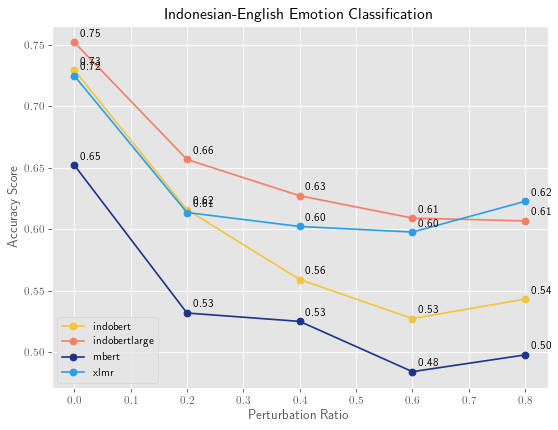

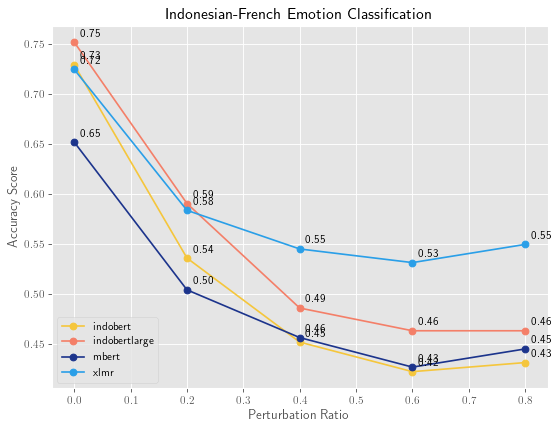

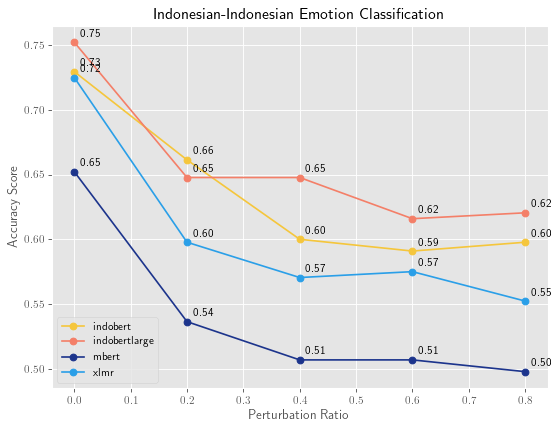

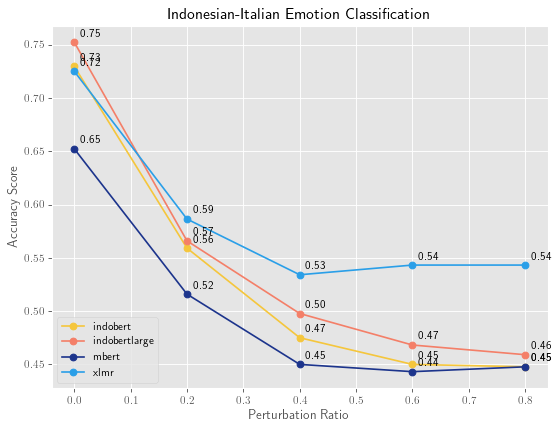

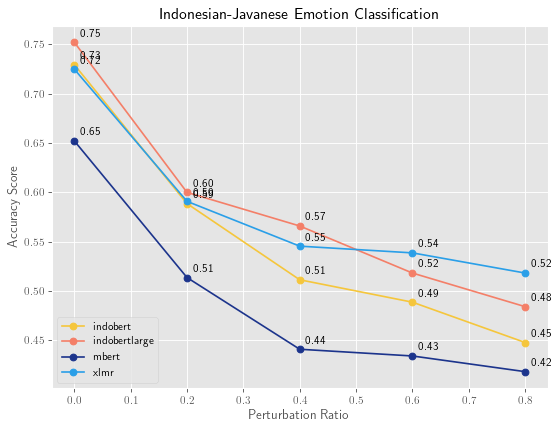

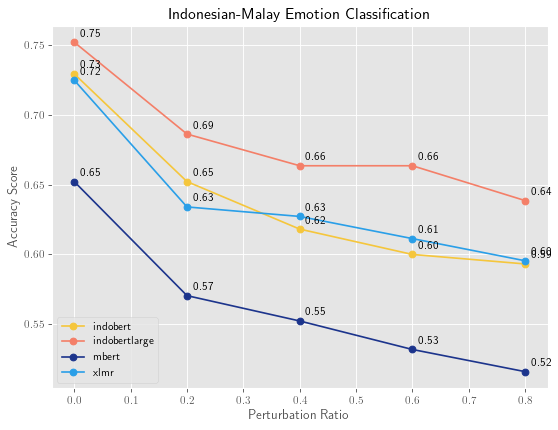

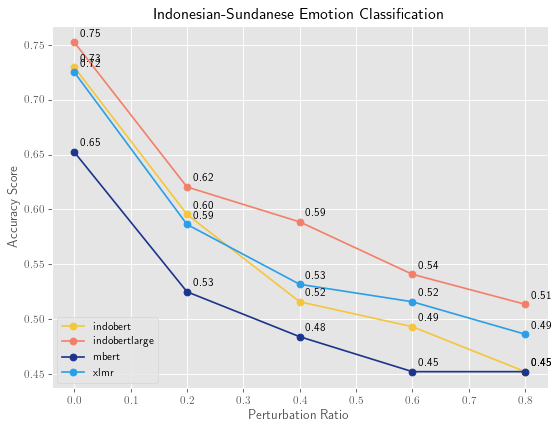

In [7]:
# plt.style.use('ggplot')

def visualize_1(lang, task):   
    lang_map = {
        "en": "English",
        'fr': "French", 
        'id': "Indonesian", 
        'it': "Italian", 
        'jw': "Javanese", 
        'ms': "Malay", 
        'su': "Sundanese"
    }

    color_map = {
        'indobert': "#f5c63c", 
        'indobertlarge': "#f47f68", 
        'mbert': "#1c348c", 
        'xlmr': "#2a9fe8"
    }

    task_map = {
        "emotion": "Emotion Classification",
        "sentiment": "Sentiment Classification"
    }


    df_lang = df[(df["codemix_lang"] == lang) & (df["downstream_task"] == task)]

    percent_pert = [0, 0.2, 0.4, 0.6, 0.8]
    list_model = df_lang.model_target.unique()
    
    figure(num=None, figsize=(8, 6), dpi=80)


    for model in list_model:
        acc_arr = df_lang[(df_lang["model_target"] == model)].after_attack_acc.values
        before_attack_acc_arr = df_lang[(df_lang["model_target"] == model)].before_attack_acc.values[0]
        acc_arr = np.insert(acc_arr, 0, before_attack_acc_arr, axis=0)

        for i, v in enumerate(acc_arr):
            plt.annotate(str(format(float(v),".2f")), xy=(percent_pert[i],v), textcoords='offset points', xytext=(5, 5))
        
        plt.plot(percent_pert, acc_arr, '-o', label='{}'.format(model), color=color_map[model])
    
    plt.legend(loc="lower left")
    plt.xlabel('Perturbation Ratio')
    plt.ylabel('Accuracy Score')
    plt.title('Indonesian-{} {}'.format(lang_map[lang], task_map[task]))
    
    # plt.savefig('plot.png')
    plt.show()

# lang_list = ['en', 'fr', 'id', 'it', 'jw', 'ms', 'su']
# for i in lang_list:
task = "emotion"
visualize_1("en", task)
visualize_1("fr", task)
visualize_1("id", task)
visualize_1("it", task)
visualize_1("jw", task)
visualize_1("ms", task)
visualize_1("su", task)

# anotasi bisa diganti warnanya sesuai warna linechart
# Kalau judul kepanjangan bisa disingkat pake lang_code

In [12]:
df_lang = df[(df["codemix_lang"] == "en") & (df["downstream_task"] == "emotion")]
acc_arr = df_lang[(df_lang["model_target"] == "indobert")].after_attack_acc.values
semantic_sim_arr = df_lang[(df_lang["model_target"] == "indobert")].avg_semantic_sim.values
semantic_sim_arr

array([0.95581625, 0.90091128, 0.85056728, 0.82078561])

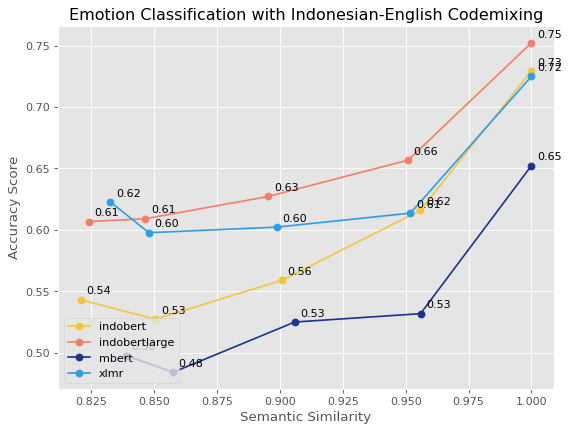

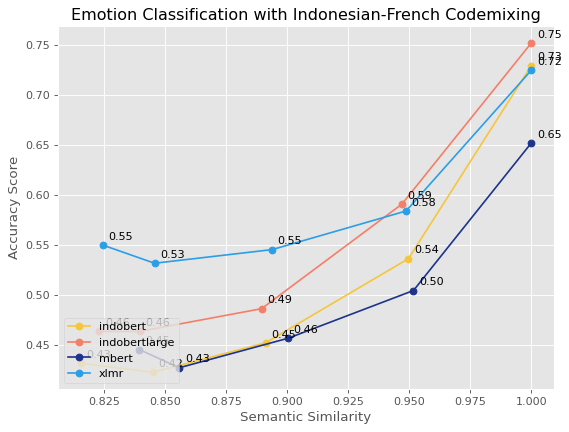

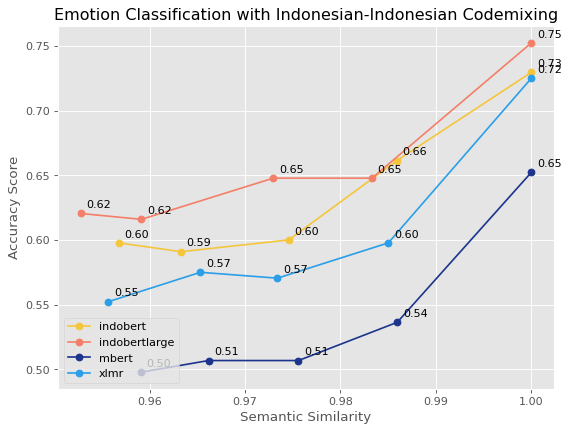

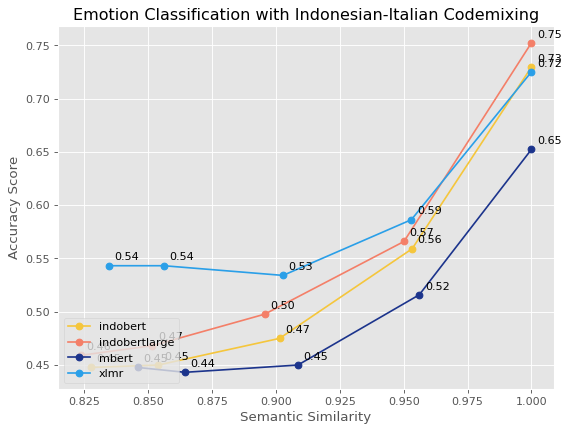

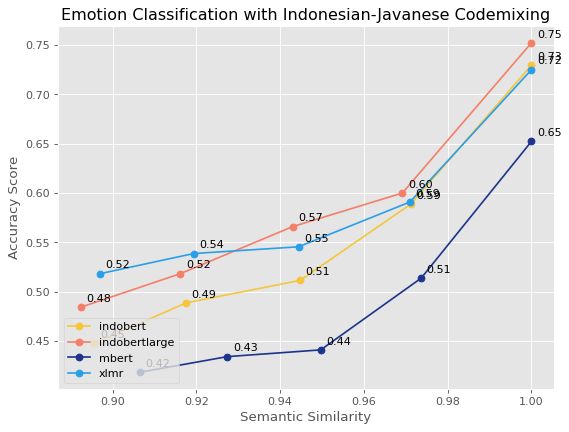

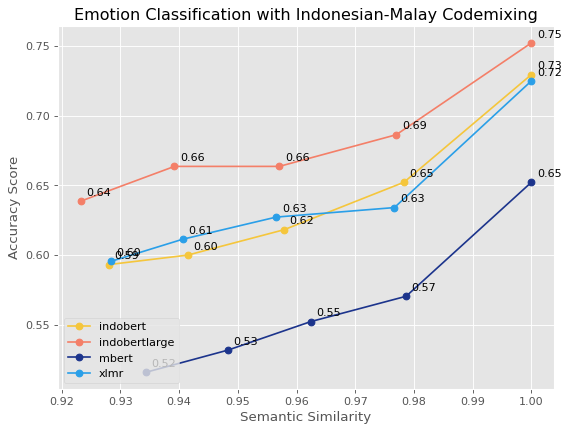

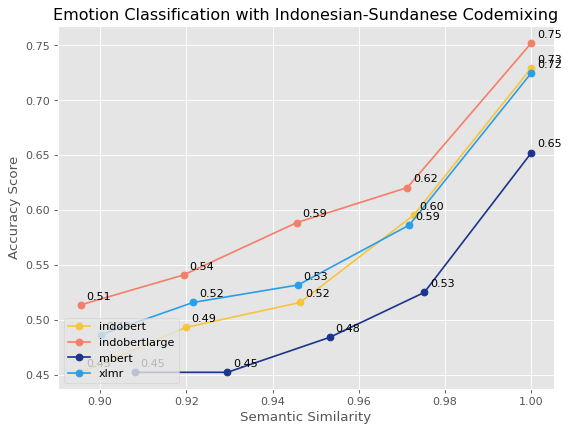

In [13]:
# plt.style.use('ggplot')

def visualize_1(lang, task):   
    lang_map = {
        "en": "English",
        'fr': "French", 
        'id': "Indonesian", 
        'it': "Italian", 
        'jw': "Javanese", 
        'ms': "Malay", 
        'su': "Sundanese"
    }

    color_map = {
        'indobert': "#f5c63c", 
        'indobertlarge': "#f47f68", 
        'mbert': "#1c348c", 
        'xlmr': "#2a9fe8"
    }

    task_map = {
        "emotion": "Emotion Classification",
        "sentiment": "Sentiment Classification"
    }


    df_lang = df[(df["codemix_lang"] == lang) & (df["downstream_task"] == task)]

    percent_pert = [0, 0.2, 0.4, 0.6, 0.8]
    list_model = df_lang.model_target.unique()
    
    figure(num=None, figsize=(8, 6), dpi=80)


    for model in list_model:
        acc_arr = df_lang[(df_lang["model_target"] == model)].after_attack_acc.values
        before_attack_acc_arr = df_lang[(df_lang["model_target"] == model)].before_attack_acc.values[0]
        acc_arr = np.insert(acc_arr, 0, before_attack_acc_arr, axis=0)
        semantic_sim_arr = df_lang[(df_lang["model_target"] == model)].avg_semantic_sim.values
        semantic_sim_arr = np.insert(semantic_sim_arr, 0, 1, axis=0)

        for i, v in enumerate(acc_arr):
            plt.annotate(str(format(float(v),".2f")), xy=(semantic_sim_arr[i],v), textcoords='offset points', xytext=(5, 5))
        
        plt.plot(semantic_sim_arr, acc_arr, '-o', label='{}'.format(model), color=color_map[model])
    
    plt.legend(loc="lower left")
    plt.xlabel('Semantic Similarity')
    plt.ylabel('Accuracy Score')
    plt.title('{} with Indonesian-{} Codemixing'.format(task_map[task], lang_map[lang]))
    
    # plt.savefig('plot.png')
    plt.show()

# lang_list = ['en', 'fr', 'id', 'it', 'jw', 'ms', 'su']
# for i in lang_list:
task = "emotion"
visualize_1("en", task)
visualize_1("fr", task)
visualize_1("id", task)
visualize_1("it", task)
visualize_1("jw", task)
visualize_1("ms", task)
visualize_1("su", task)

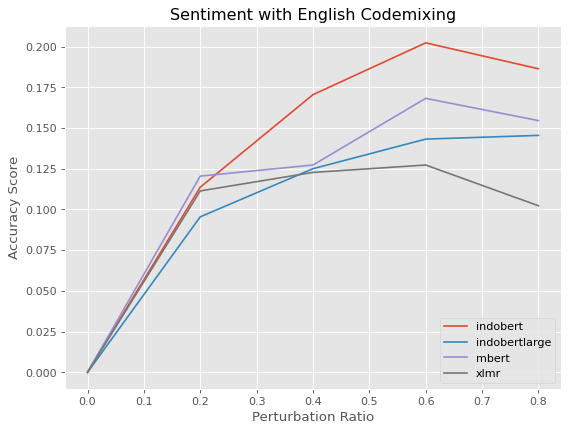

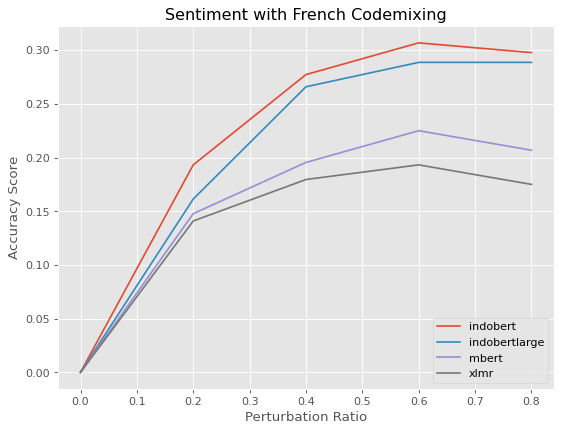

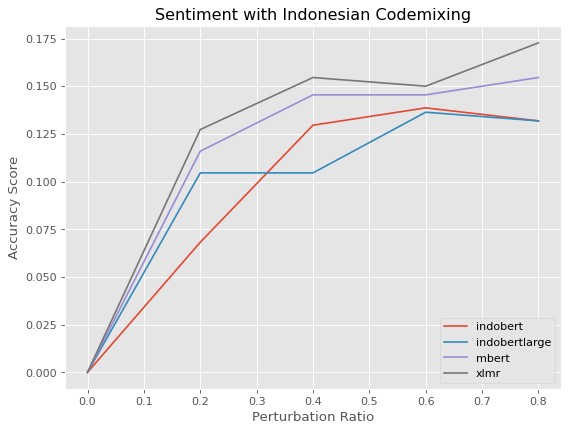

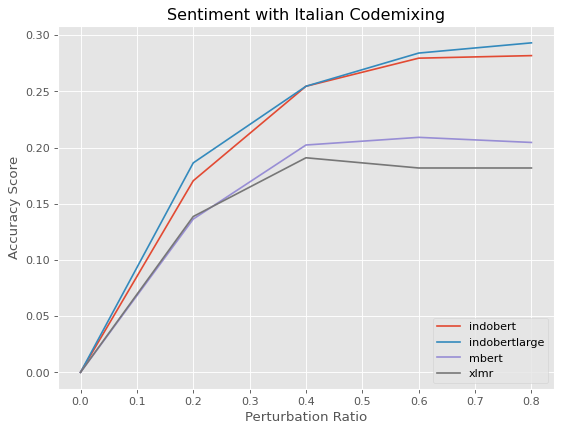

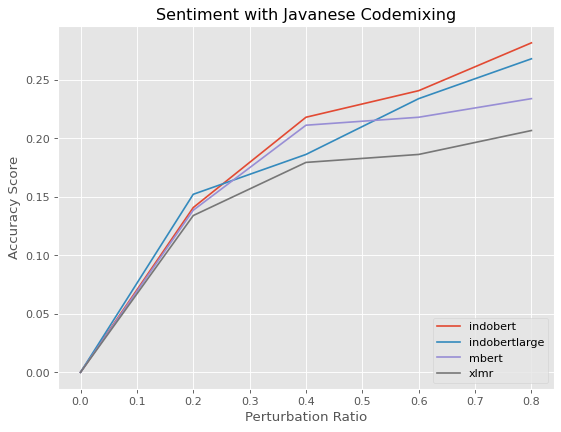

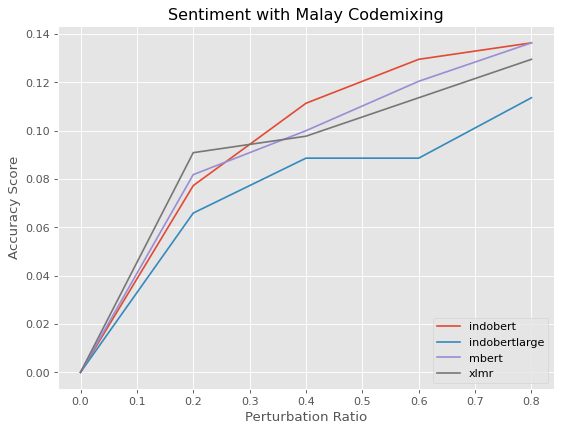

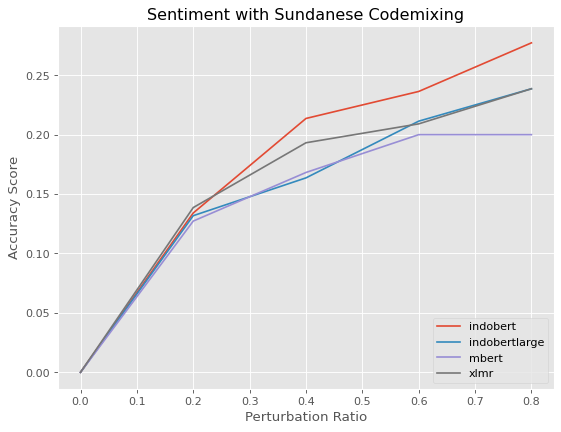

In [14]:
def visualize_3(lang, task):   
    lang_map = {
        "en": "English",
        'fr': "French", 
        'id': "Indonesian", 
        'it': "Italian", 
        'jw': "Javanese", 
        'ms': "Malay", 
        'su': "Sundanese"
    }


    df_lang = df[(df["codemix_lang"] == lang) & (df["downstream_task"] == task)]

    percent_pert = [0, 0.2, 0.4, 0.6, 0.8]
    list_model = df_lang.model_target.unique()
    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')


    for model in list_model:
        acc_arr = df_lang[(df_lang["model_target"] == model)].delta_acc.values
        before_attack_acc_arr = df_lang[(df_lang["model_target"] == model)].before_attack_acc.values[0]
        acc_arr = np.insert(acc_arr, 0, 0, axis=0)

        # print(model)
        # print(percent_pert)
        # print(acc_arr)
        plt.plot(percent_pert, acc_arr, label='{}'.format(model))
        
    plt.legend(loc="lower right")
    plt.xlabel('Perturbation Ratio')
    plt.ylabel('Accuracy Score')
    plt.title('Sentiment with {} Codemixing'.format(lang_map[lang]))
    # print('I love {} for "{}!"'.format('Geeks', 'Geeks'))
    # plt.savefig('plot.png')
    plt.show()

# lang_list = ['en', 'fr', 'id', 'it', 'jw', 'ms', 'su']
# for i in lang_list:
visualize_3("en", "emotion")
visualize_3("fr", "emotion")
visualize_3("id", "emotion")
visualize_3("it", "emotion")
visualize_3("jw", "emotion")
visualize_3("ms", "emotion")
visualize_3("su", "emotion")

In [15]:
df.head()

,filename,model_target,downstream_task,perturbation_technique,codemix_lang,perturb_ratio,before_attack_acc,after_attack_acc,delta_acc,avg_semantic_sim,avg_running_time(s)
0,indobert-emotion-codemixing-en-adv-0.2-valid.csv,indobert,emotion,codemixing,en,0.2,0.729545,0.615909,0.113636,0.955816,5.808341
1,indobert-emotion-codemixing-en-adv-0.4-valid.csv,indobert,emotion,codemixing,en,0.4,0.729545,0.559091,0.170455,0.900911,6.713864
2,indobert-emotion-codemixing-en-adv-0.6-valid.csv,indobert,emotion,codemixing,en,0.6,0.729545,0.527273,0.202273,0.850567,7.759545
3,indobert-emotion-codemixing-en-adv-0.8-valid.csv,indobert,emotion,codemixing,en,0.8,0.729545,0.543182,0.186364,0.820786,9.267136
4,indobert-emotion-codemixing-fr-adv-0.2-valid.csv,indobert,emotion,codemixing,fr,0.2,0.729545,0.536364,0.193182,0.949668,5.765455


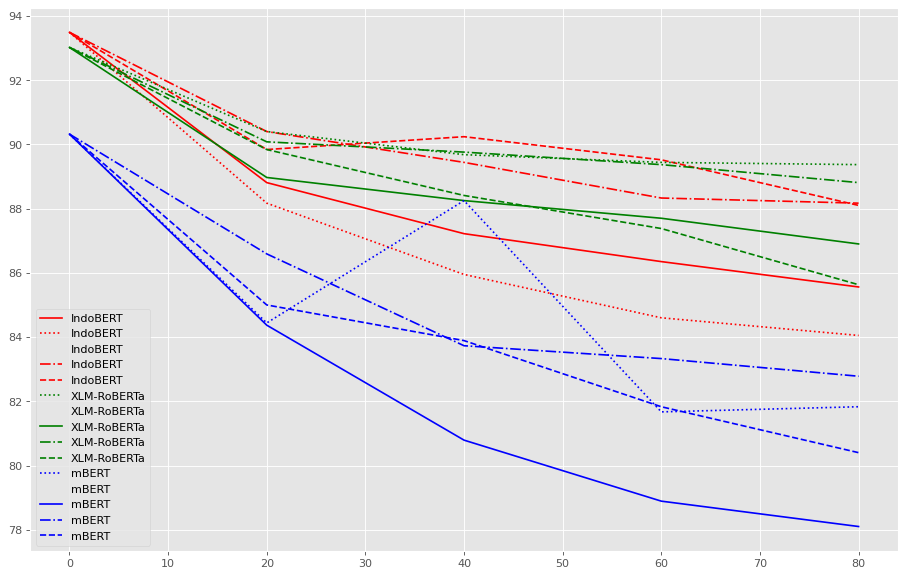

In [16]:
# x -> %pert
# y -> %acc

# figure(figsize=(14, 9), dpi=80)

fig = plt.figure(figsize=(14, 9), dpi=80)
ax = fig.add_subplot(1,1,1)

indobert_codemix_jv_acc = [93.49, 88.81, 87.22, 86.35, 85.56]
indobert_codemix_en_acc = [93.49, 88.17, 85.95, 84.60, 84.05]
indobert_codemix_su_acc = [93.49, 89.21, 87.38, 86.67, 85.08]
indobert_codemix_ms_acc = [93.49, 90.40, 89.44, 88.33, 88.17]
indobert_codemix_sr_acc = [93.49, 89.84, 90.24, 89.52, 88.10]


xlmr_codemix_jv_acc = [93.02, 88.97, 88.25, 87.70, 86.90]
xlmr_codemix_en_acc = [93.02, 90.40, 89.68, 89.44, 89.37]
xlmr_codemix_su_acc = [93.02, 89.37, 87.38, 86.19, 85.48]
xlmr_codemix_ms_acc = [93.02, 90.08, 89.76, 89.37, 88.81]
xlmr_codemix_sr_acc = [93.02, 89.84, 88.41, 87.38, 85.63]


mbert_codemix_jv_acc = [90.32, 84.44, 88.25, 81.67, 81.83]
mbert_codemix_en_acc = [90.32, 85.56, 82.38, 81.19, 82.70]
mbert_codemix_su_acc = [90.32, 84.37, 80.79, 78.89, 78.10]
mbert_codemix_ms_acc = [90.32, 86.59, 83.73, 83.33, 82.78]
mbert_codemix_sr_acc = [90.32, 85.00, 83.89, 81.83, 80.40]

pert = [0, 20, 40, 60, 80]

ax.plot(pert, indobert_codemix_jv_acc, label = "IndoBERT", linestyle="-", color="r")
ax.plot(pert, indobert_codemix_en_acc, label = "IndoBERT", linestyle=":", color="r")
ax.plot(pert, indobert_codemix_su_acc, label = "IndoBERT", linestyle=" ", color="r")
ax.plot(pert, indobert_codemix_ms_acc, label = "IndoBERT", linestyle="-.", color="r")
ax.plot(pert, indobert_codemix_sr_acc, label = "IndoBERT", linestyle="--", color="r")


ax.plot(pert, xlmr_codemix_en_acc, label = "XLM-RoBERTa", linestyle=":", color="g")
ax.plot(pert, xlmr_codemix_su_acc, label = "XLM-RoBERTa", linestyle=" ", color="g")
ax.plot(pert, xlmr_codemix_jv_acc, label = "XLM-RoBERTa", linestyle="-", color="g")
ax.plot(pert, xlmr_codemix_ms_acc, label = "XLM-RoBERTa", linestyle="-.", color="g")
ax.plot(pert, xlmr_codemix_sr_acc, label = "XLM-RoBERTa", linestyle="--", color="g")


ax.plot(pert, mbert_codemix_jv_acc, label = "mBERT", linestyle=":", color="b")
ax.plot(pert, mbert_codemix_en_acc, label = "mBERT", linestyle=" ", color="b")
ax.plot(pert, mbert_codemix_su_acc, label = "mBERT", linestyle="-", color="b")
ax.plot(pert, mbert_codemix_ms_acc, label = "mBERT", linestyle="-.", color="b")
ax.plot(pert, mbert_codemix_sr_acc, label = "mBERT", linestyle="--", color="b")

display = (0,1,2)
handles, labels = ax.get_legend_handles_labels()
# ax.legend([handle for i,handle in enumerate(handles) if i in display],
#           [label for i,label in enumerate(labels) if i in display]+['Simulation', 'Analytic'])
# plt.plot(y, x, label = "line 2", linestyle="--")
# plt.plot(x, np.sin(x), label = "curve 1", linestyle="-.")
# plt.plot(x, np.cos(x), label = "curve 2", linestyle=":")

ax.legend()
# ax.legend(title='Smoker', loc='lower left', labels=['Hell Yeh', 'Nah Bruh'])
plt.show()

In [17]:
# 

In [18]:

# 88.81
# 87.22
# 86.35
# 85.56
# 88.17
# 85.95
# 84.60
# 84.05
# 89.21
# 87.38
# 86.67
# 85.08
# 90.40
# 89.44
# 88.33
# 88.17
# 89.84
# 90.24
# 89.52
# 88.10
# 88.97
# 88.25
# 87.70
# 86.90
# 90.40
# 89.68
# 89.44
# 89.37
# 89.37
# 87.38
# 86.19
# 85.48
# 90.08
# 89.76
# 89.37
# 88.81
# 89.84
# 88.41
# 87.38
# 85.63
# 84.44
# 88.25
# 81.67
# 81.83
# 85.56
# 82.38
# 81.19
# 82.70
# 84.37
# 80.79
# 78.89
# 78.10
# 86.59
# 83.73
# 80.40
# 83.33
# 82.78
# 85.00
# 83.89
# 81.83